In [ ]:
!pip install torchsummary

In [3]:
# importing the libraries
from torchsummary import summary
import pandas as pd
import numpy as np
from skimage.io import imread, imsave
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from skimage.transform import rotate
from skimage.util import random_noise
from skimage.filters import gaussian
from scipy import ndimage

In [ ]:
# loading images
train_img = []
for img_name in tqdm(data['image_names']):
    image_path = 'emergency_vs_non-emergency_dataset/images/' + img_name
    img = imread(image_path)
    img = img/255
    train_img.append(img)

train_x = np.array(train_img)
train_y = data['emergency_or_not'].values
train_x.shape, train_y.shape

In [9]:
import cv2
import os
import glob
img_dir = "face_images/*"
files = glob.glob(img_dir)
data = []

for f1 in files:
    img = imread(f1)
    img = img/255
    data.append(img)

train_x = np.array(data)
train_x.shape

(750, 128, 128, 3)

In [13]:
final_train_data = []
final_target_train = []
for i in tqdm(range(train_x.shape[0])):
    
    final_train_data.append(train_x[i])
    
    final_train_data.append(rotate(train_x[i], angle=45, mode = 'wrap'))
    
    final_train_data.append(np.fliplr(train_x[i]))
    
    final_train_data.append(np.flipud(train_x[i]))
    
    final_train_data.append(random_noise(train_x[i],var=0.2**2))
    

100%|███████████████████████████████████████████████████████████████████████████████| 750/750 [00:03<00:00, 232.52it/s]


In [17]:

final_train = np.array(final_train_data)
final_train.shape

(3750, 128, 128, 3)

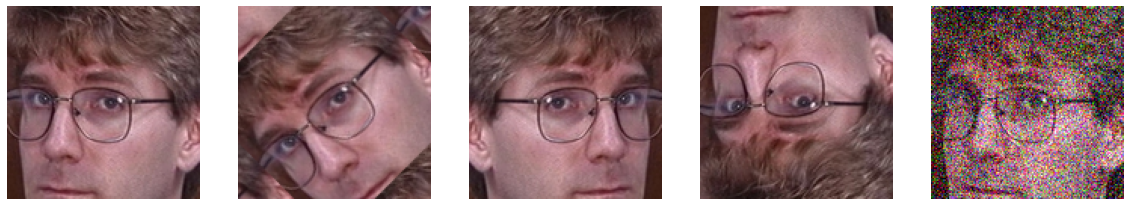

In [18]:
fig,ax = plt.subplots(nrows=1,ncols=5,figsize=(20,20))
for i in range(5):
    ax[i].imshow(final_train[i+30])
    ax[i].axis('off')